In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [2]:
df_ac_site = pd.DataFrame({
    'date': ['20220208', '20220209', '20220210', '20220211', '20220212', '20220213', '20220214'],
    'True Positive': [1, 2, 3, 2, 1, 20, 2],
    'False Positive': [2, 2, 1, 3, 0, 0, 4],
    'site_count': [6, 11, 10, 14, 8, 2, 0]
})

df_tr = pd.DataFrame({
    'date': ['20220208', '20220209', '20220210', '20220211', '20220212', '20220213', '20220214'],
    'tr_count': [50, 42, 100, 60, 10, 20, 90]
})

df_ac_site = df_ac_site.set_index('date')
df_tr = df_tr.set_index('date')

In [3]:
display(df_ac_site.head())
display(df_tr.head())

,True Positive,False Positive,site_count
date,,,
20220208,1,2,6
20220209,2,2,11
20220210,3,1,10
20220211,2,3,14
20220212,1,0,8


,tr_count
date,
20220208,50
20220209,42
20220210,100
20220211,60
20220212,10


In [28]:
DICT_SET_OPTIONS = {
    'ax1': {
        'order': [0, 0, 1],
        'color': ['lightskyblue', 'royalblue', 'wheat'],
        'unit': [' AC', ' AC', '\nsites']
    },
    'ax2': {
        'order': [2],
        'color': ['lightpink'],
        'unit': ['tr']
    },
}
X_LABEL_AX1 = 'ac site count'
X_LABEL_AX2 = 'transaction count'
N_BARS = 3  # barの種類
x_bins = np.arange(1, len(df_ac_site) + 1)
x_labels = df_ac_site.index.tolist()
margin = 0.1  # 棒の太さ。小さい程太い
total_width = 1 - margin

In [29]:
def daily_detection(df, idx, col, color, unit, df_type=None):
    if df_type == 'ac':
        if col == 'False Positive':
            # AC数はTPとFPとで積み上げ棒グラフにする
            pos = x_bins - total_width * (1 - (2 * i + 1) / N_BARS) / 2
            rects_ax1 = ax1.bar(pos,
                                df[col],
                                bottom=df['True Positive'].values,
                                width=total_width / N_BARS,
                                color=color,
                                label=col)
            for date, rect in zip(x_labels, rects_ax1):
                x = rect.get_x()
                y = rect.get_height()
                width = rect.get_width()
                if y > 0:
                    ax1.text(x=x + width / 2,
                             y=(y + df.loc[date, 'True Positive']) - (y / 2),
                             s=str(y) + unit,
                             ha='center',
                             va='center')
        else:
            pos = x_bins - total_width * (1 - (2 * i + 1) / N_BARS) / 2
            rects_ax1 = ax1.bar(pos,
                                df[col],
                                width=total_width / N_BARS,
                                color=color,
                                label=col)
            for rect in rects_ax1:
                x = rect.get_x()
                y = rect.get_height()
                width = rect.get_width()
                if y > 0:
                    ax1.text(x=x + width / 2,
                             y=y / 2,
                             s=str(y) + unit,
                             ha='center',
                             va='center')
    elif df_type == 'tr':
        pos = x_bins - total_width * (1 - (2 * i + 1) / N_BARS) / 2
        rects_ax2 = ax2.bar(pos,
                            df[col],
                            width=total_width / N_BARS,
                            color=color,
                            label=col)
        for rect in rects_ax2:
            x = rect.get_x()
            y = rect.get_height()
            width = rect.get_width()
            if y > 0:
                ax2.text(x=x + width / 2,
                         y=y / 2,
                         s=str(y) + unit,
                         ha='center',
                         va='center')
    else:
        print('df_typeにいずれかを入力してください。【ac / tr】')

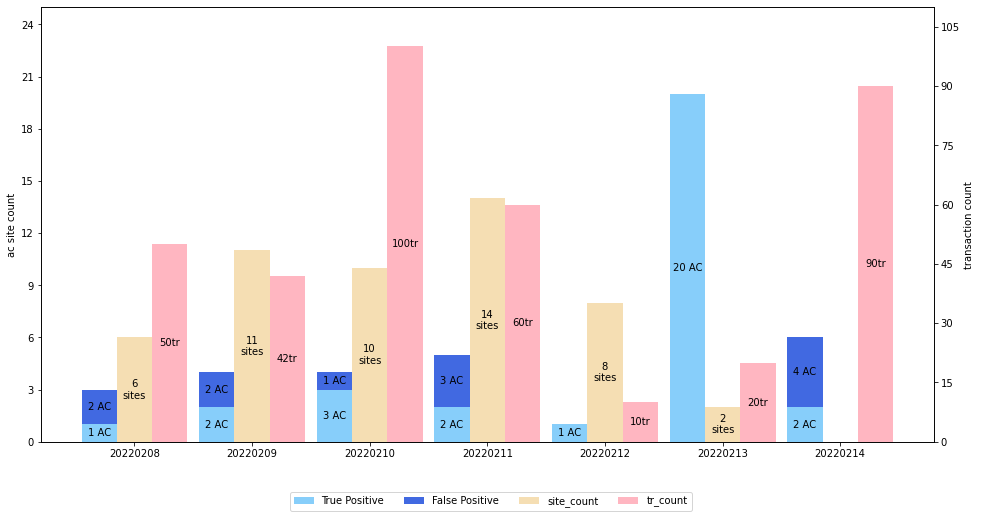

In [30]:
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot()
ax2 = ax1.twinx()

max_sum_ax1 = df_ac_site.max().max()
ylimit_ax1 = (max_sum_ax1 // 5) * 5 + 5
max_sum_ax2 = df_tr.max().max()
ylimit_ax2 = (max_sum_ax2 // 10) * 10 + 10

# ax1のプロット
for i, col, color, unit in zip(DICT_SET_OPTIONS['ax1']['order'],
                               df_ac_site.columns,
                               DICT_SET_OPTIONS['ax1']['color'], 
                               DICT_SET_OPTIONS['ax1']['unit']):
    daily_detection(df_ac_site, i, col, color, unit, df_type='ac')

# ax2のプロット
for i, col, color, unit in zip(DICT_SET_OPTIONS['ax2']['order'],
                               df_tr.columns,
                               DICT_SET_OPTIONS['ax2']['color'],
                               DICT_SET_OPTIONS['ax2']['unit']):
    daily_detection(df_tr, i, col, color, unit, df_type='tr')

ax1.set_xticks(x_bins, x_labels)
ax1.set_ylabel(X_LABEL_AX1)
ax1.set_ylim(0, ylimit_ax1)
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))

ax2.set_ylabel(X_LABEL_AX2)
ax2.set_ylim(0, ylimit_ax2)
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

fig.legend(loc='lower center', ncol=4)
plt.savefig('hoge.png', bbox_inches='tight', pad_inches=0.25)
plt.show()